![http://feng.li/](logo.png)Brought to you by [Dr. Feng Li](http://feng.li)

**{Other Formats Available: [PDF](http://feng.li/python) | [HTML](http://feng.li/python) | [SLIDES](http://feng.li/python)}**

# Major Python modules for Data Wrangling

## `NumPy`

`NumPy` is short for Numerical Python, is the foundational package for scientific computing in Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases. 

- [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/)
- [NumPy User Guide](http://docs.scipy.org/doc/numpy/user/index.html)

## `SciPy` 

`SciPy` is a collection of packages addressing a number of different standard problem domains in scientific computing. Here is a sampling of the packages included:

- `scipy.integrate` : numerical integration routines and differential equation solvers.
- `scipy.linalg` : linear algebra routines and matrix decompositions extending beyond those provided in `numpy.linalg`.
- `scipy.optimize` : function optimizers (minimizers) and root finding algorithms.
- `scipy.signal` : signal processing tools.
- `scipy.sparse` : sparse matrices and sparse linear system solvers.
- `scipy.special` : wrapper around SPECFUN, a Fortran library implementing many common mathematical functions, such as the gamma function.
- `scipy.stats` : standard continuous and discrete probability distributions (density functions, samplers, continuous distribution functions), various statistical tests, and more descriptive statistics.
- `scipy.weave` : tool for using inline C++ code to accelerate array computations.

- `scipy.cluster` :	Clustering algorithms
- `scipy.fftpack` : Fast Fourier Transform routines
- `scipy.integrate` : Integration and ordinary differential equation solvers
- `scipy.interpolate` : Interpolation and smoothing splines
- `scipy.ndimage` : N-dimensional image processing
optimize 	Optimization and root-finding routines
- `scipy.spatial` : Spatial data structures and algorithms

[SciPy Reference Guide](http://docs.scipy.org/doc/scipy/reference/)

## `pandas`

`pandas` provides rich data structures and functions designed to make working with structured data fast, easy, and expressive. It is, as you will see, one of the critical in-gredients enabling Python to be a powerful and productive data analysis environment. pandas combines the high performance array-computing features of `NumPy` with the flexible data manipulation capabilities of spreadsheets and relational databases (such as SQL). It provides sophisticated indexing functionality to make it easy to reshape, slice and dice, perform aggregations, and select subsets of data.

pandas consists of the following things

- A set of labeled array data structures, the primary of which are Series and DataFrame
- Index objects enabling both simple axis indexing and multi-level / hierarchical axis indexing
- An integrated group by engine for aggregating and transforming data sets
- Date range generation (date_range) and custom date offsets enabling the implementation of customized frequencies
- Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel 2003), and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.
- Memory-efficient “sparse” versions of the standard data structures for storing data that is mostly missing or mostly constant (some fixed value)
- Moving window statistics (rolling mean, rolling standard deviation, etc.)
- Static and moving window linear and panel regression

[pandas Documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/)


## `statsmodels`

The `statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. 

The `statsmodels` module covers the following topics

- Linear Regression Models
- Plotting
- Discrete Choice Models
- Nonparametric Statistics
- Generalized Linear Models
- Robust Regression
- Statistics
- Time Series Analysis
- State space models

# Linear Algebra （线性代数）

Linear algebra can be done conveniently via `scipy.linalg`. When SciPy is built using the optimized ATLAS LAPACK and BLAS libraries, it has very fast linear algebra capabilities. If you dig deep enough, all of the raw lapack and blas libraries are available for your use for even more speed. In this section, some easier-to-use interfaces to these routines are described.

All of these linear algebra routines expect an object that can be converted into a 2-dimensional array. The output of these routines is also a two-dimensional array.

## Matrices and n-dimensional array （矩阵和多维数组）

In [1]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [2]:
linalg.inv(A) # inverse of a matrix

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [3]:
b = np.array([[5,6]]) #2D array
b

array([[5, 6]])

In [4]:
b.T

array([[5],
       [6]])

In [5]:
A*b #not matrix multiplication!

array([[ 5, 12],
       [15, 24]])

In [6]:
A.dot(b.T) #matrix multiplication

array([[17],
       [39]])

In [12]:
b = np.array([5,6]) #1D array
b

array([5, 6])

In [13]:
b.T  #not matrix transpose!

array([5, 6])

In [14]:
A.dot(b)  #does not matter for multiplication

array([17, 39])

## Solving linear system （求解线性方程组）

In [15]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [16]:
b = np.array([[5],[6]])
b

array([[5],
       [6]])

In [17]:
linalg.inv(A).dot(b) #slow

array([[-4. ],
       [ 4.5]])

In [18]:
A.dot(linalg.inv(A).dot(b))-b #check

array([[ 0.],
       [ 0.]])

In [19]:
np.linalg.solve(A,b) #fast

array([[-4. ],
       [ 4.5]])

In [20]:
A.dot(np.linalg.solve(A,b))-b #check

array([[ 0.],
       [ 0.]])

## Determinant （行列式）

In [21]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
linalg.det(A)

-2.0

## Least-squares problems and pseudo-inverses （最小二乘和广义逆）

In [22]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [23]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))

In [24]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

In [25]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

In [26]:
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

## Eigenvalues and eigenvectors （特征向量和特征值）

In [27]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
la,v = linalg.eig(A)
l1,l2 = la
print(l1, l2)  #eigenvalues

print(v[:,0])  #first eigenvector

print(v[:,1])  #second eigenvector

print(np.sum(abs(v**2),axis=0)) #eigenvectors are unitary

v1 = np.array(v[:,0]).T
print(linalg.norm(A.dot(v1)-l1*v1)) #check the computation

(-0.372281323269+0j) (5.37228132327+0j)
[-0.82456484  0.56576746]
[-0.41597356 -0.90937671]
[ 1.  1.]
5.551115123125783e-17


## Singular Value Decomposition (SVD) （奇异值分解）

In [28]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6]])

In [29]:
M,N = A.shape
U,s,Vh = linalg.svd(A)
Sig = linalg.diagsvd(s,M,N)

In [30]:
U, Vh = U, Vh
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

In [31]:
Sig

array([[ 9.508032  ,  0.        ,  0.        ],
       [ 0.        ,  0.77286964,  0.        ]])

In [32]:
Vh

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [33]:
U.dot(Sig.dot(Vh)) #check computation

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

## QR decomposition （QR分解）

The command for QR decomposition is `linalg.qr`.

## LU decomposition （LU分解）
    
The SciPy command for this decomposition is `linalg.lu`.  If the intent for performing LU decomposition is for solving linear systems then the command `linalg.lu_factor` should be used followed by repeated applications of the command `linalg.lu_solve` to solve the system for each new right-hand-side.

## Cholesky decomposition （乔列斯基分解）

The command `linalg.cholesky` computes the cholesky factorization. For using Cholesky factorization to solve systems of equations there are also `linalg.cho_factor` and `linalg.cho_solve` routines that work similarly to their LU decomposition counterparts.

# Statistical Distributions （统计分布函数）

A large number of probability distributions as well as a growing library of statistical functions are available in `scipy.stats`. See http://docs.scipy.org/doc/scipy/reference/stats.html for a complete list.

Generate random numbers from normal distribution:

In [6]:
from scipy.stats import norm
r = norm.rvs(loc=0, scale=1, size=1000)

Calculate a few first moments:

In [7]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Linear regression model （线性回归模型）

This example computes a least-squares regression for two sets of measurements.

In [38]:
from scipy import stats
import numpy as np
x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print({'slope':slope,'intercept':intercept})
print({'p_value':p_value,'r-squared':round(r_value**2,2)})

{'slope': -0.16344304227778697, 'intercept': 0.60919656607207551}
{'p_value': 0.65616905736353337, 'r-squared': 0.029999999999999999}


## Optimization （优化）

The `minimize` function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in `scipy.optimize`

In [5]:
import numpy as np
from scipy.optimize import minimize

## Define the function
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

## Calling the minimize() function
res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


# Generalized Linear Models

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
star98 = sm.datasets.star98.load_pandas().data
formula = 'SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + \
           PCTYRRND + PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF'
dta = star98[['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
              'PCTCHRT', 'PCTYRRND', 'PERMINTE', 'AVYRSEXP', 'AVSALK',
              'PERSPENK', 'PTRATIO', 'PCTAF']].copy()
endog = dta['NABOVE'] / (dta['NABOVE'] + dta.pop('NBELOW'))
del dta['NABOVE']
dta['SUCCESS'] = endog

/usr/lib/python3/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -189.70
Date:                Thu, 19 Apr 2018   Deviance:                       380.66
Time:                        22:49:05   Pearson chi2:                     8.48
No. Iterations:                     5                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4037     25.036      0.016      0.987     -48.665      49.472
LOWINC                      -0.0204      0.010     -1.982      0.048      -0.041      -0.000
PERASIAN                     0.0159      0.017      0.910      0.363      -0.018       0.050
PERBLACK                    -0.0198      0.020     -1.004      0.316      -0.058       0.019
PERHISP                     -0.0096      0.010     -0.951      0.341      -0.029       0.010
PCTCHRT                     -0.0022      0.022     -0.103      0.918      -0.045       0.040
PCTYRRND                    -0.0022      0.006     -0.348      0.728      -0.014       0.010
PERMINTE                     0.1068      0.787      0.136      0.892      -1.436       1.650
AVYRSEXP                    -0.0411      1.176     -0.035      0.972      -2.346       2.264
PERMINTE:AVYRSEXP           -0.0031      0.054     -0.057      0.954      -0.108       0.102
AVSALK                       0.0131      0.295      0.044      0.965      -0.566       0.592
PERMINTE:AVSALK             -0.0019      0.013     -0.145      0.885      -0.028       0.024
AVYRSEXP:AVSALK              0.0008      0.020      0.038      0.970      -0.039       0.041
PERMINTE:AVYRSEXP:AVSALK  5.978e-05      0.001      0.068      0.946      -0.002       0.002
PERSPENK                    -0.3097      4.233     -0.073      0.942      -8.606       7.987
PTRATIO                      0.0096      0.919      0.010      0.992      -1.792       1.811
PERSPENK:PTRATIO             0.0066      0.206      0.032      0.974      -0.397       0.410
PCTAF                       -0.0143      0.474     -0.030      0.976      -0.944       0.916
PERSPENK:PCTAF               0.0105      0.098      0.107      0.915      -0.182       0.203
PTRATIO:PCTAF               -0.0001      0.022     -0.005      0.996      -0.044       0.044
PERSPENK:PTRATIO:PCTAF      -0.0002      0.005     -0.051      0.959      -0.010       0.009
============================================================================================
"""

## Autoregressive Moving Average (ARMA)

In [14]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



Let's first make the time series plot

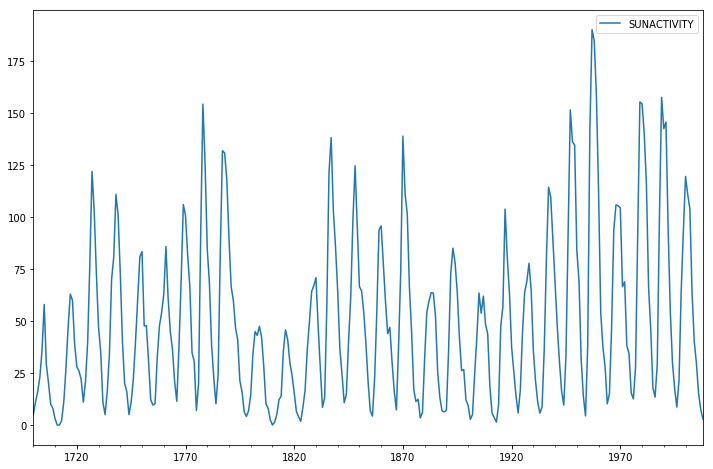

In [5]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8));

The ACF and PACF

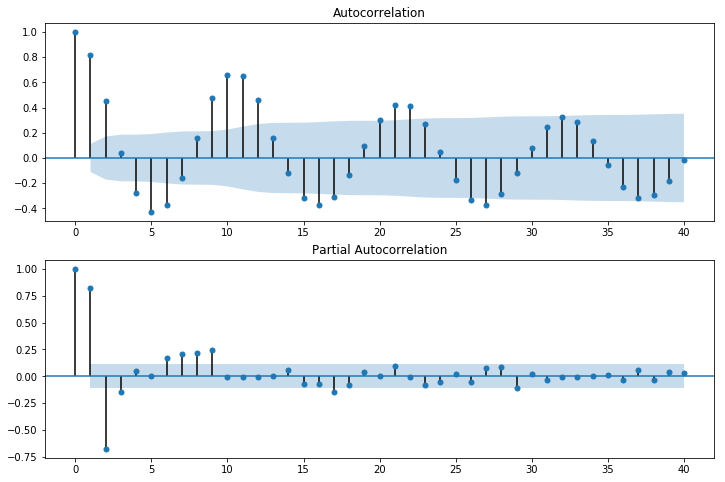

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)


Fit an ARIMA model

In [8]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

const                49.659439
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


/usr/lib/python3/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib/python3/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/usr/lib/python3/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib/python3/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/lib/python3/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


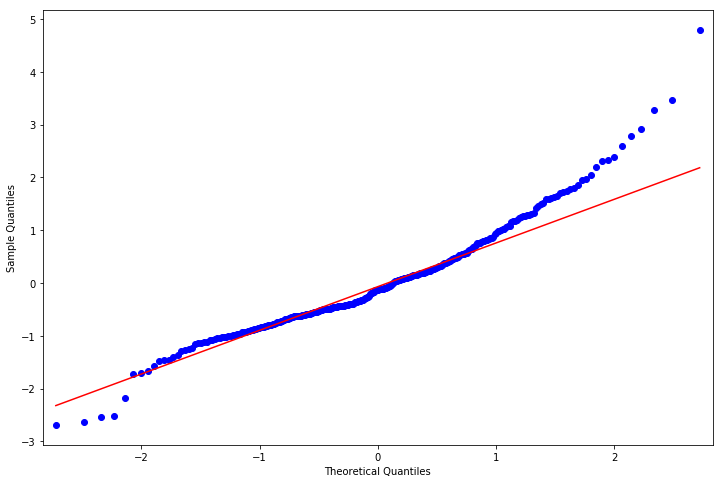

In [11]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
resid = arma_mod30.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

Let's then do some predictions

/usr/lib/python3/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


1990-12-31    167.047415
1991-12-31    140.993003
1992-12-31     94.859126
1993-12-31     46.860928
1994-12-31     11.242625
1995-12-31     -4.721247
1996-12-31     -1.166870
1997-12-31     16.185719
1998-12-31     39.021893
1999-12-31     59.449867
2000-12-31     72.170128
2001-12-31     75.376768
2002-12-31     70.436449
2003-12-31     60.731588
2004-12-31     50.201810
2005-12-31     42.076050
2006-12-31     38.114314
2007-12-31     38.454669
2008-12-31     41.963835
2009-12-31     46.869298
2010-12-31     51.423264
2011-12-31     54.399717
2012-12-31     55.321688
Freq: A-DEC, dtype: float64


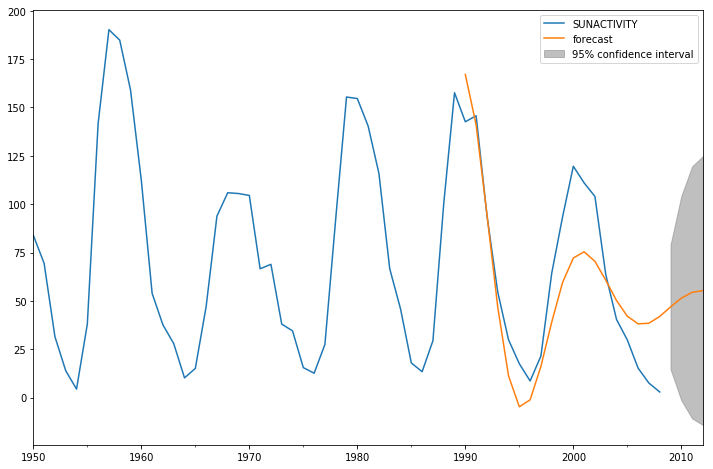

In [13]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

# Lab

Use the data from cycle in the U.S. unemployment rate to model the rrends and cycles in unemployment.

```python
from pandas_datareader.data import DataReader
endog = DataReader('UNRATE', 'fred', start='1954-01-01')
```